In [1]:

#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle

### 1. Acquire data from the cloud database.

### You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

### Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
#acquire data
df = wrangle.get_zillow_data()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc,heatingorsystemdesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,236,012,000.00",0.01,2017-01-01,NaN,Central,NaN,NaN,Condominium,NaN,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,319,001,006.00",-0.00,2017-09-20,NaN,Central,NaN,NaN,Condominium,NaN,Central
77376,673515,11000655,NaN,NaN,NaN,2.00,2.00,NaN,6.00,2.00,...,"60,371,014,003,002.00",0.02,2017-09-20,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
77377,2968375,17239384,NaN,NaN,NaN,2.00,4.00,NaN,NaN,2.00,...,"61,110,084,022,016.00",0.01,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,1843709,12773139,1.00,NaN,NaN,1.00,3.00,NaN,4.00,1.00,...,"60,374,338,022,005.00",0.04,2017-09-21,NaN,Central,NaN,NaN,Single Family Residential,NaN,Central


### 2.Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [3]:
#check shape
df.shape

(77380, 68)

In [4]:
#show info with count
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [5]:
#description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"77,380.00","1,495,126.49","860,905.69",349.00,"752,050.00","1,497,870.00","2,240,480.25","2,982,274.00"
parcelid,"77,380.00","13,007,149.52","3,481,368.13","10,711,855.00","11,538,296.75","12,531,548.50","14,211,843.75","167,689,317.00"
airconditioningtypeid,"24,953.00",1.81,2.97,1.00,1.00,1.00,1.00,13.00
architecturalstyletypeid,206.00,7.39,2.73,2.00,7.00,7.00,7.00,21.00
basementsqft,50.00,679.72,689.70,38.00,273.00,515.00,796.50,"3,560.00"
bathroomcnt,"77,380.00",2.30,1.00,0.00,2.00,2.00,3.00,18.00
bedroomcnt,"77,380.00",3.05,1.14,0.00,2.00,3.00,4.00,16.00
buildingclasstypeid,15.00,3.93,0.26,3.00,4.00,4.00,4.00,4.00
buildingqualitytypeid,"49,671.00",6.53,1.72,1.00,6.00,6.00,8.00,12.00
calculatedbathnbr,"76,771.00",2.32,0.98,1.00,2.00,2.00,3.00,18.00


### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [6]:
def observations_column_nulls(df):
    return pd.concat([
        df.isnull().sum().rename('num_rows_missing'),
        df.isnull().mean().rename('percent_rows_missing')
    ], axis = 1)

In [7]:
observations_column_nulls(df)

,num_rows_missing,percent_rows_missing
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52427,0.68
architecturalstyletypeid,77174,1.00
basementsqft,77330,1.00
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,77365,1.00
buildingqualitytypeid,27709,0.36
calculatedbathnbr,609,0.01


### Prepare

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.



In [9]:
def observations_row_nulls(df):
    return pd.concat([
        df.isnull().sum(axis = 1).rename('num_rows_missing'),
        df.isnull().mean(axis = 1).rename('percent_row_missing')
    ], axis = 1).value_counts().sort_index()

In [10]:
observations_row_nulls(df)

num_rows_missing  percent_row_missing
23                0.34                       2
24                0.35                      13
25                0.37                      24
26                0.38                      65
27                0.40                     316
28                0.41                     455
29                0.43                    5270
30                0.44                    3455
31                0.46                    9891
32                0.47                   12579
33                0.49                   14782
34                0.50                   13326
35                0.51                    5148
36                0.53                    5775
37                0.54                    3620
38                0.56                    1925
39                0.57                     285
40                0.59                     230
41                0.60                      29
42                0.62                      23
43                0.63

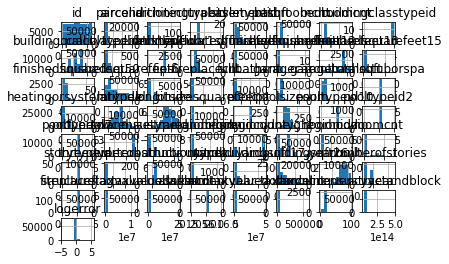

<Figure size 432x288 with 0 Axes>

In [15]:
df.hist()
plt.tight_layout()
plt.figure()
plt.show()

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

### . The input:
### . A dataframe
#### . A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
### . A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
### . The output:
### . The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
### .hint:
### . Look up the dropna documentation.
### . You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [12]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    '''
    Utilizing an input proportion for the column and rows of DataFrame df,
    drop the missing values per the axis contingent on the amount of data present.
    '''
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    df = df.dropna(axis=0, thresh=n_required_row)
    df = df.dropna(axis=1, thresh=n_required_column)
    return df